<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [10]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-27 21:00:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  43.3MB/s    in 0.8s    

2024-01-27 21:00:25 (43.3 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [86]:
!pip install -U seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


Import pandas module.


In [12]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


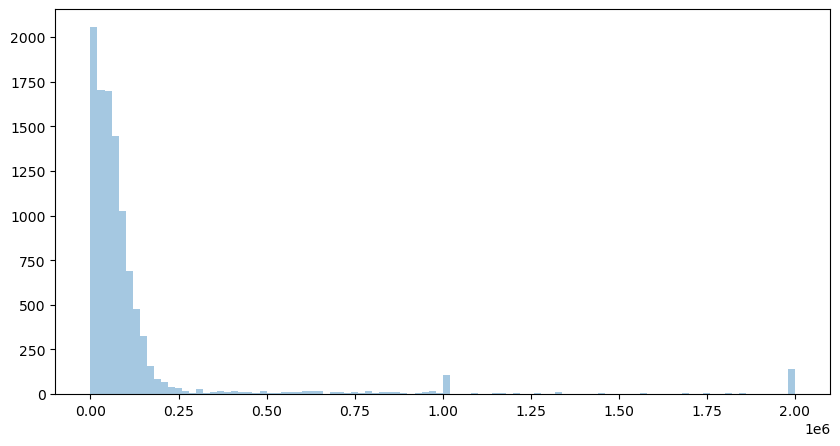

In [94]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,5))
sns.distplot(df, hist=True, kde=False, bins=100)
plt.show()

### Box Plots


Plot a box plot of `Age.`


        Age
0      22.0
1      23.0
2      28.0
3      26.0
4      29.0
...     ...
11393  36.0
11394  25.0
11395  34.0
11396  25.0
11397  30.0

[11398 rows x 1 columns]


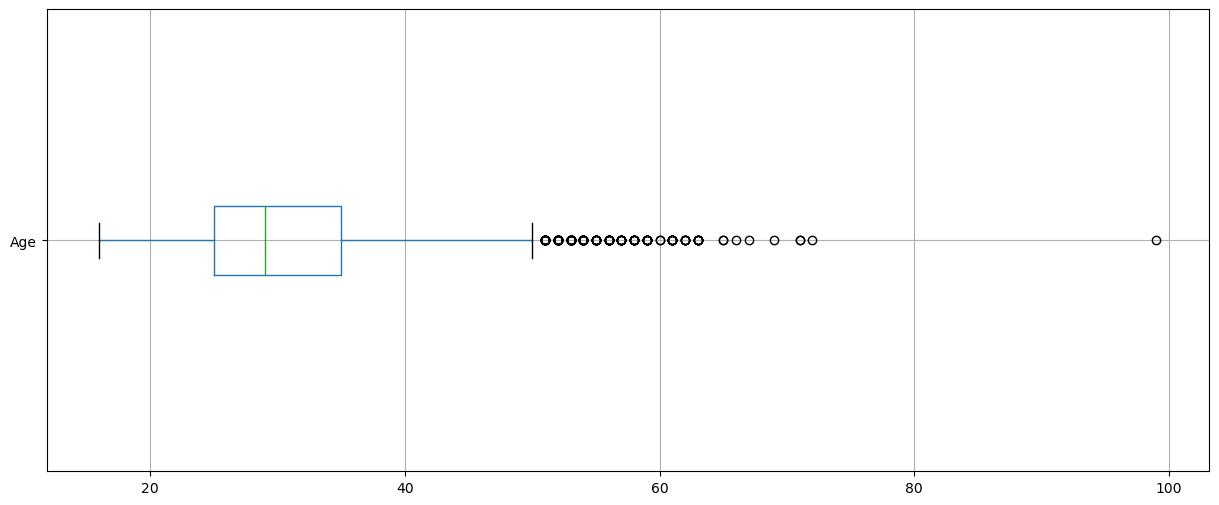

In [63]:
# your code goes here

QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
print(df)
plt.figure(figsize=(15,6))
df.boxplot(vert=False)
plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


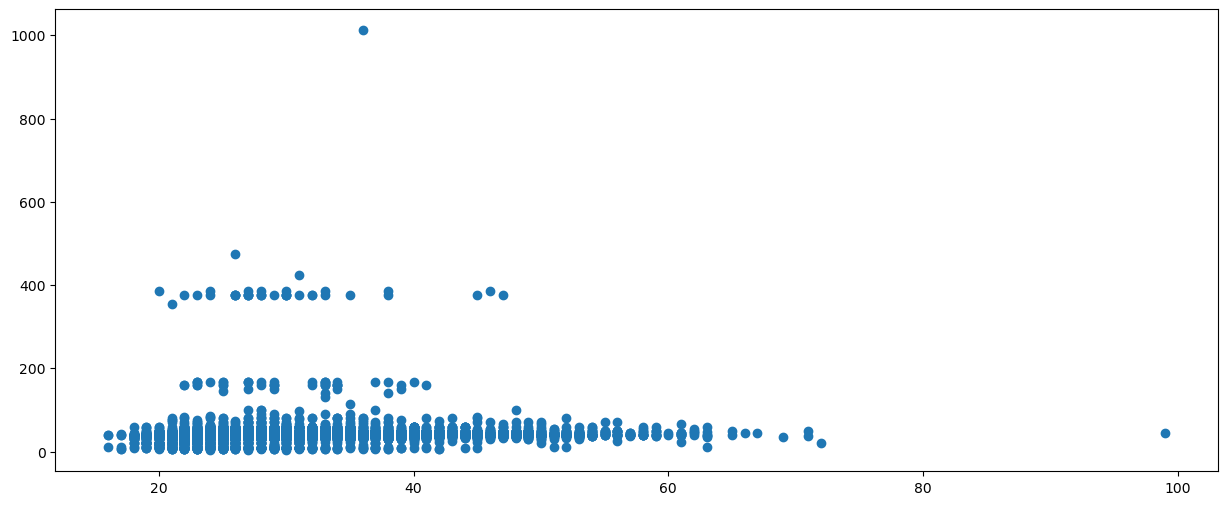

In [70]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(15, 6))
plt.scatter(x='Age', y='WorkWeekHrs', data=df)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


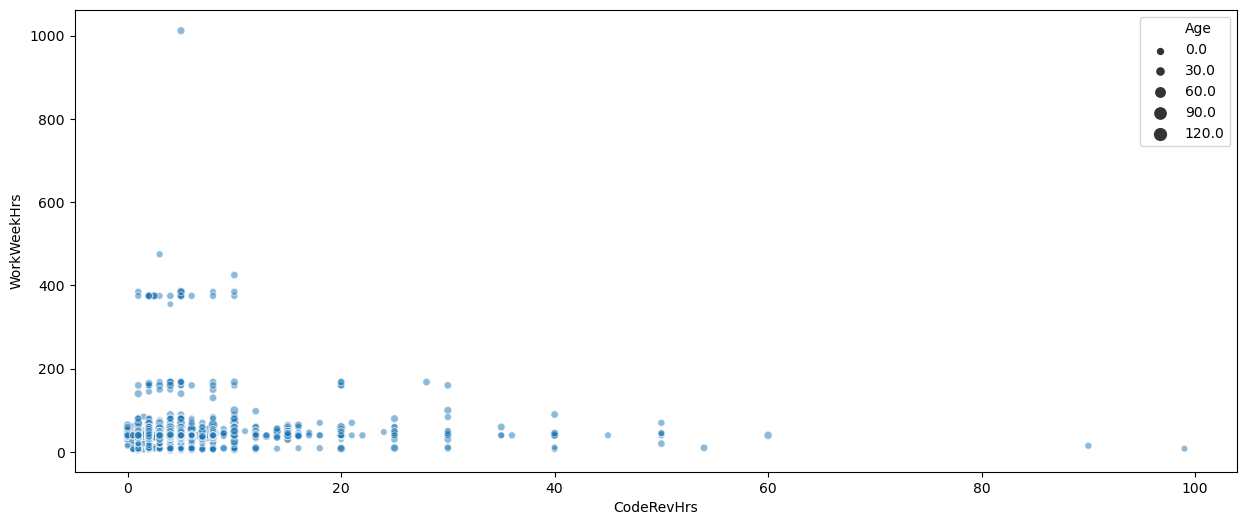

In [102]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(15, 6))
sns.scatterplot(data = df, y = 'WorkWeekHrs', x = 'CodeRevHrs', size = 'Age', alpha = 0.5)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


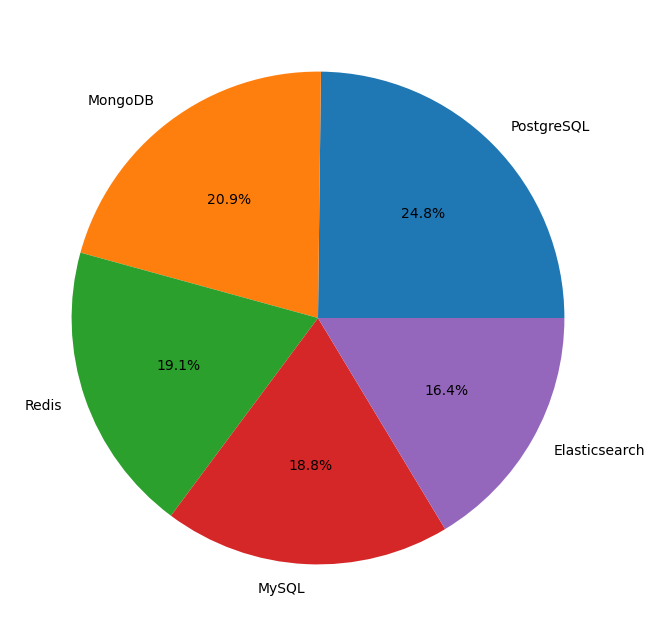

In [124]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count 
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)
df

plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%' )
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


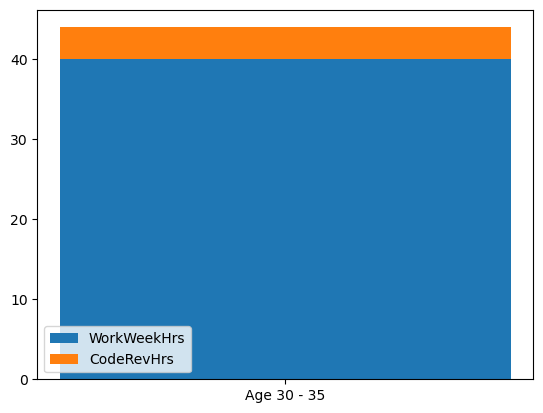

In [134]:
# your code goes here

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age 
FROM master
WHERE Age BETWEEN 30 AND 35
"""

df = pd.read_sql_query(QUERY,conn)

df_med_wwh = df.groupby('Age')['WorkWeekHrs'].median()
df_med_crh = df.groupby('Age')['CodeRevHrs'].median()


fig, ax = plt.subplots()

ax.bar('Age 30 - 35', df_med_wwh, label='WorkWeekHrs')
ax.bar('Age 30 - 35', df_med_crh, bottom=df_med_wwh, label='CodeRevHrs')
ax.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age', ylabel='ConvertedComp'>

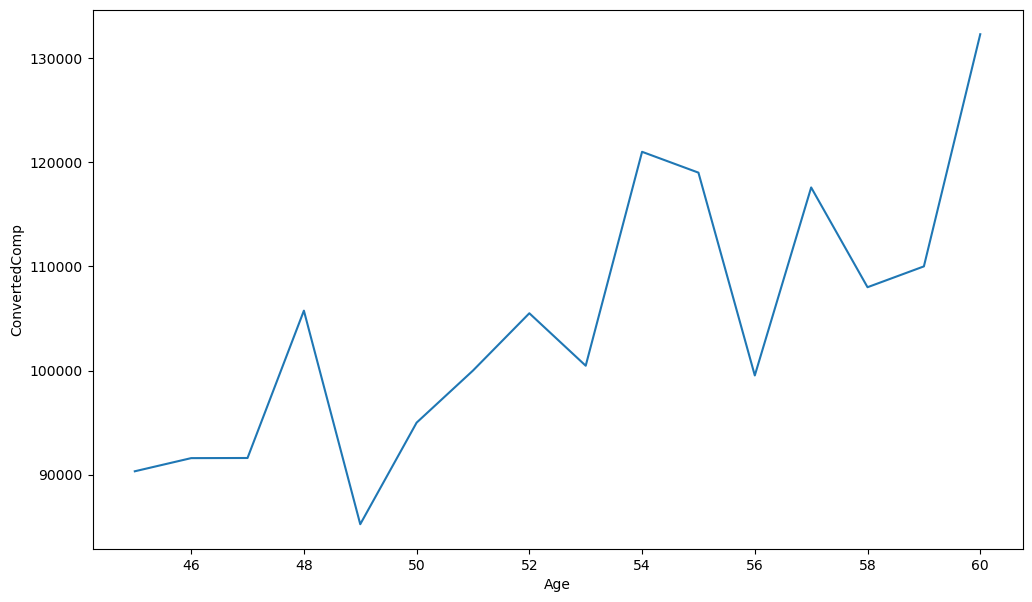

In [145]:
# your code goes here

QUERY = """
SELECT ConvertedComp, Age 
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df = pd.read_sql_query(QUERY,conn)

med = df.groupby('Age')['ConvertedComp'].median().to_frame().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=med, x='Age', y = 'ConvertedComp')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<function matplotlib.pyplot.show(close=None, block=None)>

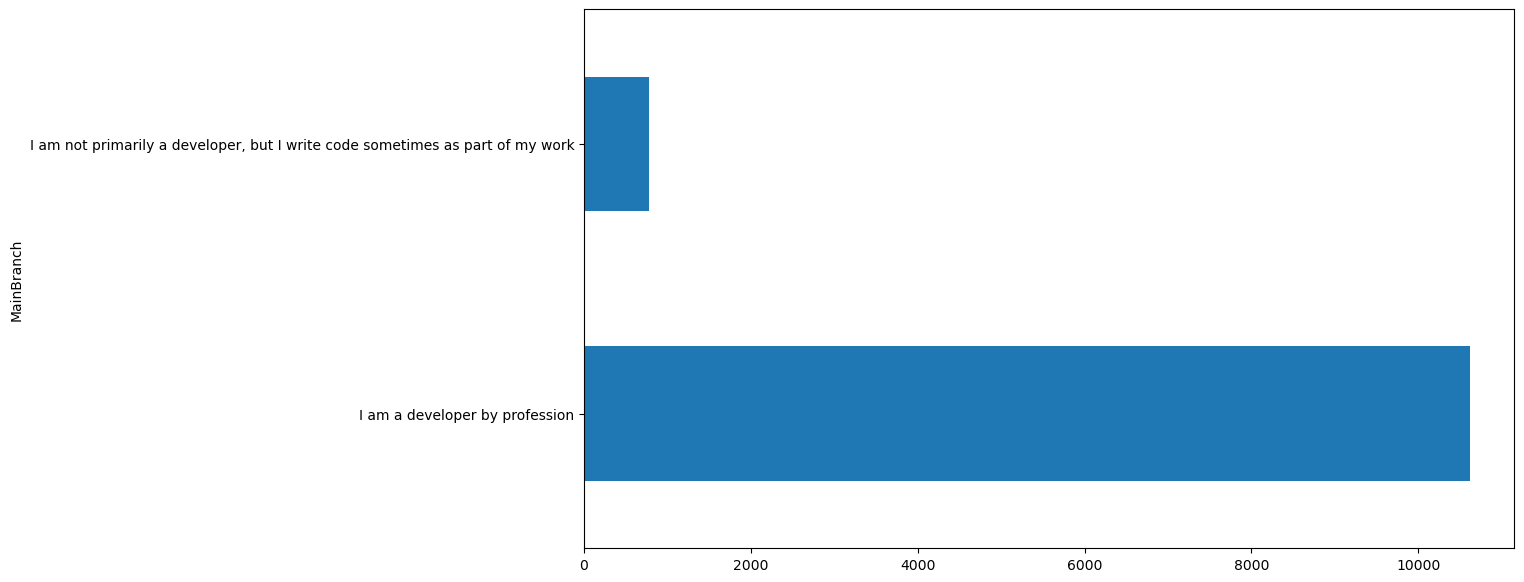

In [151]:
# your code goes here

QUERY = """
SELECT MainBranch 
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('MainBranch')['MainBranch'].count()

plt.figure(figsize=(12, 7))
df1.plot(kind='barh')
plt.show

Close the database connection.


In [152]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
